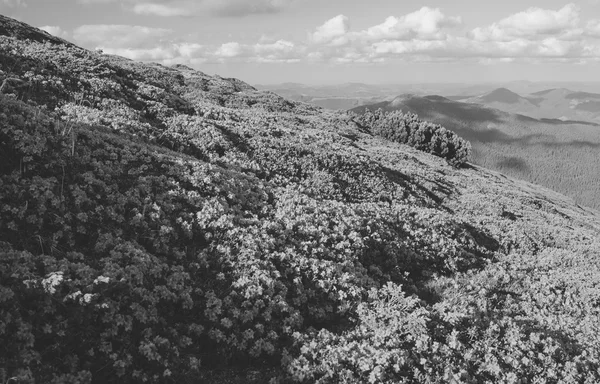

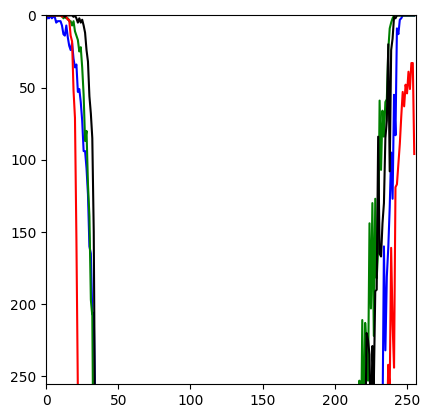

Contrast 58.546272015180634


In [58]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('Gambar/gambar4.jpg')

# Memisahkan warna RGB pada gambar asli
b,g,r = cv2.split(img)

# Mengubah gambar asli menjadi grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar asli
display(Image.fromarray(gray))

# Calculate the histogram of the image
# fungsi calcHist ini memiliki parameter
# 1. image
# 2. channel
# 3. mask
# 4. histSize (jumlah bin yang digunakan untuk histogram plot semakin banyak, maka semakin detail)
# 5. ranges

hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(hist_b, color = 'blue')
plt.plot(hist_g, color = 'green')
plt.plot(hist_r, color = 'red')
plt.plot(hist_gray, color = 'black')
plt.xlim([0, 256])
plt.imshow(hist)
plt.show()


# average_intensity
average_intensity = np.mean(gray)

# image contrast
def calculate_contrast(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    std = np.std(img)
    return std 

contrast = calculate_contrast(img)
print("Contrast", contrast)

TASK 1

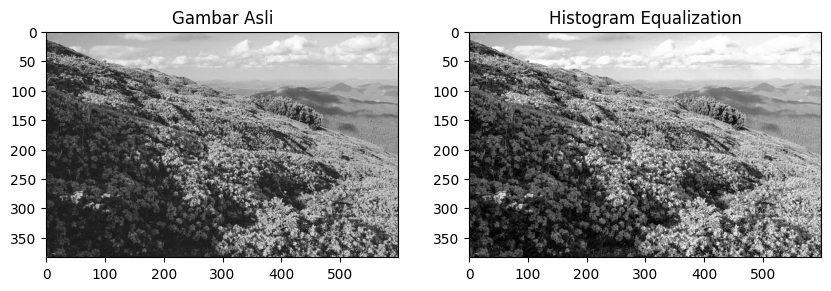

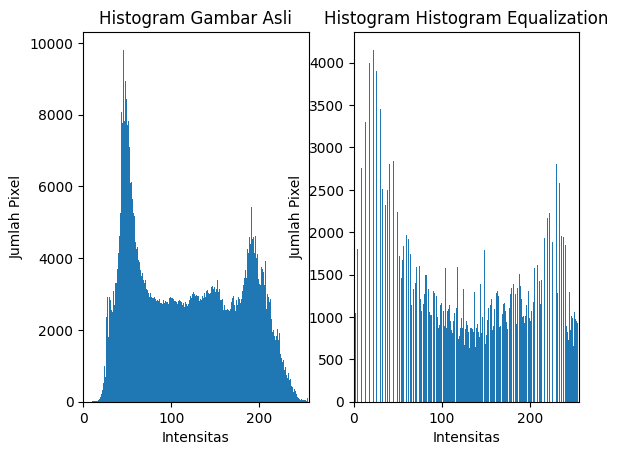

: 

In [65]:

# Histogram Equalization
def histogram_equalization(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # calculate the cdf

    # Menghitung jumlah kumulatif dari histogram
    cdf = hist.cumsum()

    # Menghitung menggunakan rumus equalization
    cdf_normalized = cdf * hist.max() / cdf.max()

    
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    equ = cdf[img]

    return equ

# histogram equalization
img3 = histogram_equalization(img)

# menghitung histogram gambar asli dan histogram equalization
hist_orig, bins_orig = np.histogram(img.ravel(), 256, [0, 256])
hist_eq, bins_eq = np.histogram(img3.ravel(), 256, [0, 256])

# Menampilkan gambar asli dan gambar hasil equalization
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Gambar Asli')
ax[1].imshow(img3, cmap='gray')
ax[1].set_title('Histogram Equalization')
plt.show()

# menampilkan tabel histogram gambar asli dan histogram equalization
plt.subplot(121), plt.bar(bins_orig[:-1], hist_orig, width=1)
plt.xlim([0, 256])
plt.title('Histogram Gambar Asli')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Pixel')

plt.subplot(122), plt.bar(bins_eq[:-1], hist_eq, width=1)
plt.xlim([0, 256])
plt.title('Histogram Histogram Equalization')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Pixel')

plt.show()